In [19]:
import sys
sys.path.append('../')

In [20]:
import pathlib

IMAGE_DIR = pathlib.Path('../data/images/generated/')

In [21]:
import os
from PIL import Image, ImageOps

def create_image_grid(input_dir: pathlib.Path, image_size: int, rows: int, columns: int, border_size: int = 1) -> Image.Image:
    image_files = [f for f in os.listdir(input_dir) if f.endswith('.png')]
    if len(image_files) < rows * columns:
        raise ValueError(f"Number of images in {input_dir} is less than required ({rows}x{columns}).")
    image_size_with_border = (image_size + 2 * border_size, image_size + 2 * border_size)
    grid_size = (rows * image_size_with_border[0], columns * image_size_with_border[1])
    grid = Image.new('RGB', grid_size, color='white')
    for j in range(columns):
        for i in range(rows):
            image_path = os.path.join(input_dir, image_files[j * 10 + i])
            img = Image.open(image_path)
            img_with_border = ImageOps.expand(img, border=border_size, fill='white')
            grid.paste(img_with_border, (j * image_size_with_border[0], i * image_size_with_border[1]))
    return grid

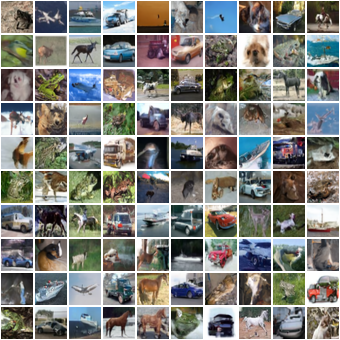

In [22]:
# CIFAR-10
grid = create_image_grid(IMAGE_DIR / 'CIFAR10', image_size=32, rows=10, columns=10)
grid.save(IMAGE_DIR / 'CIFAR10_grid.png')
display(grid)


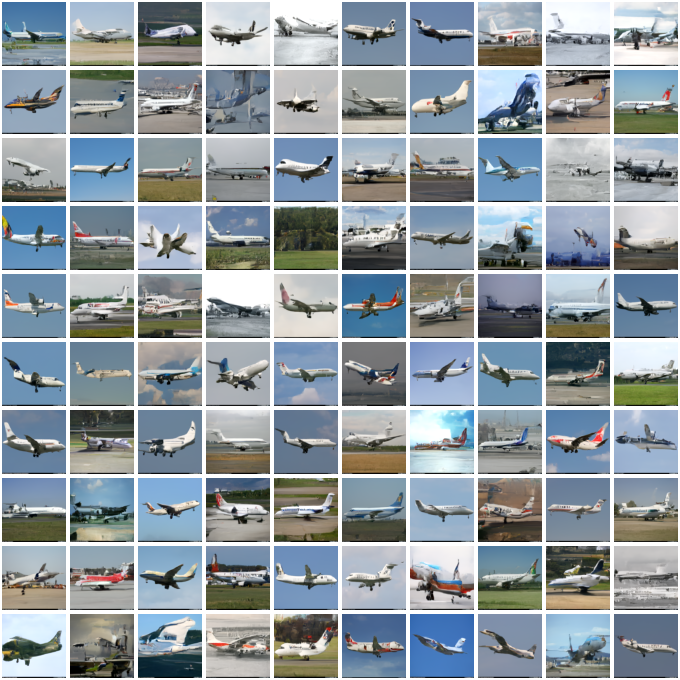

In [23]:
# FGVC-Aircraft
grid = create_image_grid(IMAGE_DIR / 'FGVCAircraft', image_size=64, rows=10, columns=10, border_size=2)
grid.save(IMAGE_DIR / 'FGVCAircraft_grid.png')
display(grid)


In [24]:
# Flowers102
grid = create_image_grid(IMAGE_DIR / 'Flowers102_128', image_size=128, rows=10, columns=9, border_size=2)
grid.save(IMAGE_DIR / 'Flowers102_grid.png')
display(grid)

IndexError: list index out of range